### "In which regions of Russia small business feels better and why?"
By Grinin M., Kurmanayevskaya A.

*Code written by Maxim Grinin*

## Importing Data

In [2]:
import pandas as pd
import numpy as np
from googletrans import Translator
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Following Excel files must be at the same folder with coding file, else specify path to file
files = ['avg_salary.xlsx', 
         'grp.xlsx',
         'budget.xlsx',
         'pop.xlsx', 
         'small_business.xlsx',
         'employed.xlsx',
         'sb_employee.xlsx',
         'efficiency.xlsx']

# Reads all files above into one list of data frames 
dfs = [pd.read_excel(file) for file in files]

In [4]:
# Merging all data frames in the list (dfs) bases on column 'Регион'
data = reduce(lambda left,right: pd.merge(left,right,on='Регион'), dfs)
data

,Регион,Средняя зарплата,ВРП,Бюджет,Население,Число малых предприятий,Численность занятого населения,Численность работников МП,Количество действующих программ,Группа
0,Алтайский край,22733.493642,508.8,639415.97,2317153,34576,1053979,162289,2,Средний
1,Амурская область,37364.556651,266.1,358203.16,790044,10191,390397,54874,1,Средний
2,Архангельская область,40565.751203,467.1,506537.16,1092424,14095,531678,74930,2,Средний
3,Астраханская область,29301.151003,421.0,268586.75,1005782,9957,497262,47467,4,Средний
4,Белгородская область,29077.334584,785.6,585870.82,1549151,23266,792231,118402,2,Средний
...,...,...,...,...,...,...,...,...,...,...
80,Чеченская Республика,23128.806146,178.9,468814.73,1478726,2886,535459,23787,7,Неэффективный
81,Чувашская Республика,24559.301952,270.6,320868.87,1217818,16350,595319,80818,2,Средний
82,Чукотский авт.округ,92579.182689,68.7,185494.74,50288,367,30427,2459,0,Неэффективный
83,Ямало-Ненецкий авт. округ,89914.777120,2461.4,1221061.81,544444,5404,303383,31488,8,Средний


## Transforming Data

#### <font color='red'>!!!WARNING!!!</font>
After processing 10.000 symbols through Google Translator API, Google ban further requests for a day 🤡 (JSON error will occur). VPN solve this problem. 😈

In [7]:
# Translates columns names
data.columns = ['region', 'avg_salary', 'GRP', 'budget', 'population', 'small_business',
                'total_employees', 'sb_employees', 'active_programms', 'group']

# Translates content of several columns with google translator
translator = Translator()

data['region'] = data['region'].apply(translator.translate).apply(getattr, args=('text', ))
data['group'] = data['group'].apply(translator.translate).apply(getattr, args=('text', ))

In [8]:
# GRP was presented in billions of rubles
# Region's budget was in billions of rubles
# Converting them to absolute value
data['GRP'] *= (10 ** 9) 
data['budget'] *= (10 ** 6)

In [9]:
data.head(10)

,region,avg_salary,GRP,budget,population,small_business,total_employees,sb_employees,active_programms,group
0,Altai region,22733.493642,5.088000e+11,6.394160e+11,2317153,34576,1053979,162289,2,Middle
1,Amur region,37364.556651,2.661000e+11,3.582032e+11,790044,10191,390397,54874,1,Middle
2,Arhangelsk region,40565.751203,4.671000e+11,5.065372e+11,1092424,14095,531678,74930,2,Middle
3,Astrakhan region,29301.151003,4.210000e+11,2.685868e+11,1005782,9957,497262,47467,4,Middle
4,Belgorod region,29077.334584,7.856000e+11,5.858708e+11,1549151,23266,792231,118402,2,Middle
5,Bryansk region,24411.473825,3.077000e+11,3.750588e+11,1192491,12957,586401,78049,3,Middle
6,Vladimir region,27840.775359,4.156000e+11,3.964400e+11,1358416,19366,697509,121917,1,Middle
7,Volgograd region,27895.645408,7.714000e+11,6.328728e+11,2491036,28639,1196849,153465,3,Middle
8,Vologda Region,31595.689308,5.083000e+11,4.484623e+11,1160445,26394,554900,99592,3,Middle
9,Voronezh region,28338.283138,8.652000e+11,6.836800e+11,2324205,36935,1127622,225997,5,Effective


## Exploratory Data Analysis

In [10]:
print('data shape:', data.shape)
print('columns names:', data.columns)

data shape: (85, 10)
columns names: Index(['region', 'avg_salary', 'GRP', 'budget', 'population', 'small_business',
       'total_employees', 'sb_employees', 'active_programms', 'group'],
      dtype='object')


In [11]:
# Some initial EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            85 non-null     object 
 1   avg_salary        85 non-null     float64
 2   GRP               85 non-null     float64
 3   budget            85 non-null     float64
 4   population        85 non-null     int64  
 5   small_business    85 non-null     int64  
 6   total_employees   85 non-null     int64  
 7   sb_employees      85 non-null     int64  
 8   active_programms  85 non-null     int64  
 9   group             85 non-null     object 
dtypes: float64(3), int64(5), object(2)
memory usage: 7.3+ KB


In [12]:
# Some initial descriptive statistics
data.describe()

,avg_salary,GRP,budget,population,small_business,total_employees,sb_employees,active_programms
count,85.000000,8.500000e+01,8.500000e+01,8.500000e+01,85.000000,8.500000e+01,8.500000e+01,85.000000
mean,35126.186713,8.814918e+11,7.781243e+11,1.726451e+06,32406.788235,8.507755e+05,1.410149e+05,3.788235
std,15358.262125,1.809651e+12,1.495798e+12,1.813673e+06,66415.730768,9.665272e+05,2.119479e+05,3.101820
min,21796.792754,4.460000e+10,6.262691e+10,4.411100e+04,367.000000,2.040000e+04,2.367000e+03,0.000000
25%,25814.361906,2.133000e+11,2.474288e+11,7.334980e+05,8214.000000,3.553540e+05,4.389200e+04,2.000000
50%,30170.840370,4.210000e+11,4.489250e+11,1.160445e+06,17112.000000,5.549000e+05,8.690600e+04,3.000000
75%,37364.556651,8.652000e+11,8.920778e+11,2.317153e+06,30630.000000,1.053979e+06,1.525160e+05,5.000000
max,92579.182689,1.572490e+13,1.324399e+13,1.267808e+07,556927.000000,7.095400e+06,1.659804e+06,16.000000


In [13]:
# Skewness
data.skew().sort_values() 

active_programms    1.830263
avg_salary          2.104245
population          3.374275
total_employees     3.913411
sb_employees        4.930798
small_business      6.390887
GRP                 6.867458
budget              7.191265
dtype: float64

Skewness of all of the variables is greater than 1, which means that the distribution of these data is highly skewed. Also it is positive in all cases, so the mass of the distribution is concentrated on the left of the figure. 

In [14]:
# Kurtosis
data.kurt().sort_values()

active_programms     3.834488
avg_salary           4.068674
population          16.171526
total_employees     21.207022
sb_employees        31.839070
small_business      47.828998
GRP                 55.034578
budget              58.868935
dtype: float64

Kurtosis of all of the variables is greater than 3, therefore, the dataset has heavier tails than a normal distribution. This kind of distribution should produce more outliers, but in this case, the variables' values vary greatly, as they depend on many factors not presented in this analysis (such as political ones).

Text(0, 0.5, 'Active programms')

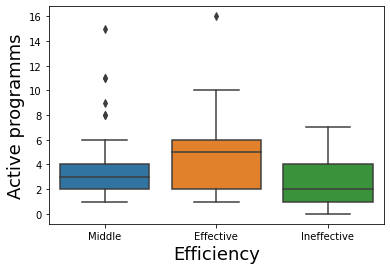

In [15]:
# Efficiency distributed by the number of active programms
sns.boxplot(x=data['group'],y=data['active_programms'])
plt.xlabel('Efficiency',fontsize=18)
plt.ylabel('Active programms',fontsize=18)

This boxplot shows the distribution of the number of active programs among efficiency groups. The median number of programs that are proven to be effective is expectedly higher than that of programs that show middle levels of efficiency and inefficient ones. There are some outliers (such as 16 programs for the 'Effective' group), but they are not a mistake, as they represent different regions with different governorships and levels of financing.

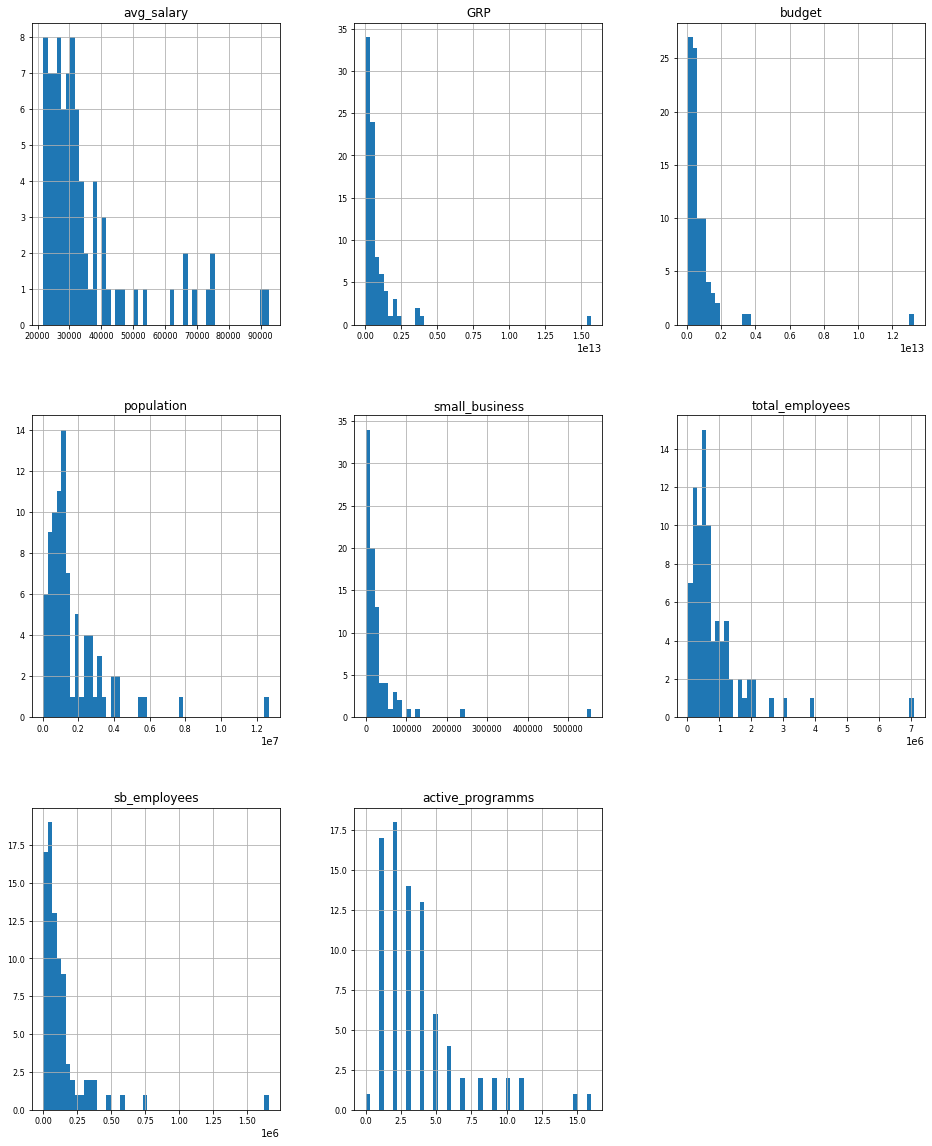

In [16]:
# Numerical data distribution histograms
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

As it has already been said, the data is highly skewed and has heavier tails than normal distribution; the graphs above confirm these statements. Distribution of the number of active programs is closest to normal distribution, and it is proven both by its skewness and kurtosis, and by its graphical representation.

<AxesSubplot:>

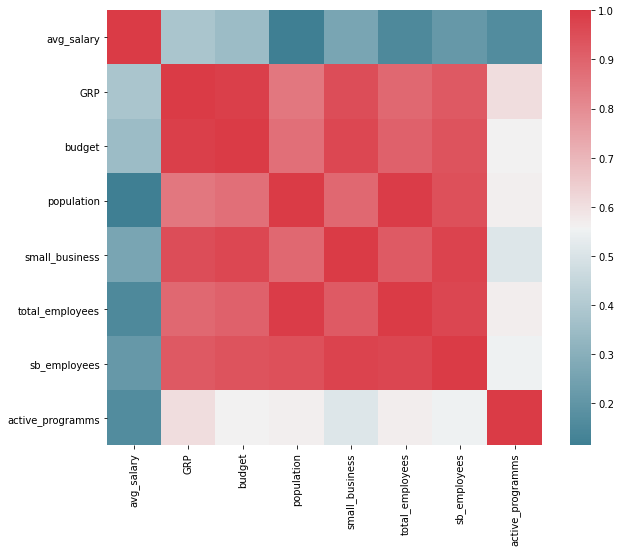

In [22]:
# Correlation heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

   As it can be seen from the correlation heatmap, the strongest correlation is observed between the number of Small Businesses (small_business) and GRP, Budget, and the number of Employees in the Small Business (sb_employees). Surprisingly, the number of Small Businesses almost does not correlate with the Average Salary (avg_salary).

In [23]:
# Identifying values, strongly correlated with the number of Small Businesses
df_num_corr = df_num.corr()['small_business'][:-5] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with number of Small Businesses:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with number of Small Businesses:
budget    0.968327
GRP       0.952366
Name: small_business, dtype: float64


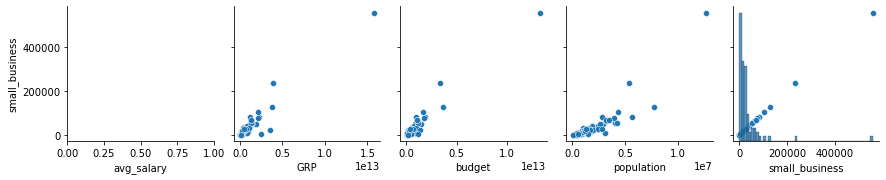

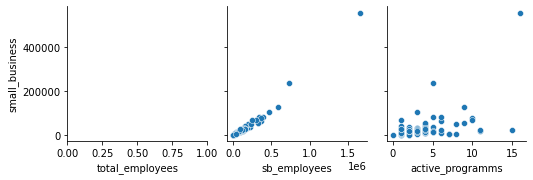

In [24]:
# Scatterplots for the number of Small Businesses and other variables 
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['small_business'])

Scatterplots are used to depict linear relationship between the number of Small Businesses (small_business) and other numerical variables. The strongest relations are Population, and the number of Employees in the Small Business (sb_employees).

## Linear Regression

In [41]:
import sklearn.linear_model as lm

X = data.iloc[:,[False, True, True, True, True, False, True, True, True, False]]
y = data.iloc[:, -5]

skm = lm.LinearRegression()
# Launch parameters calculation for listed data
skm.fit(X, y)

# Display parameters of calculated model
R = skm.score(X, y)
print('coefficient of determination first model (R squared):', R)
coefficient_df = pd.DataFrame(skm.coef_, [
    'avg_salary',
    'GRP',
    'budget',
    'population',
    'total_employees',
    'sb_employees',
    'active_programms',], columns=['coef'])

print(coefficient_df)

coefficient of determination first model (R squared): 0.9885172909745606
                      coef
avg_salary       -0.022071
GRP               0.018588
budget            0.452570
population       -0.193339
total_employees  -0.092616
sb_employees      0.851392
active_programms -0.027544


This is an attempt at computing a Linear Regression model for given data. The number of Small Businesses (small_business) is the dependent variable, while other numerical variables are independent. 
The output shows us the determination coefficient of the model, which provides a measure of how well observed outcomes are replicated by the model - it is very close to 1; this means the model predicts outcomes well. 
The coefficients used in the model are presented after the determination coefficient. They depict the relation between the dependent and independent variables.

## Modeling

### Normalize data with the following formula:
 $ X_{norm} = \frac{(X - X_{min})}{(X_{max} - X_{min})}$

In [42]:
# Normalize all values in dataframe (with the exeption of region and group of efficency of supportive programms)
# as it is categorical data

norm_data = data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_data[(norm_data.drop(['region', 'group'],axis=1)).columns] = scaler.fit_transform(norm_data[(norm_data.drop(
        ['region', 'group'], axis=1)).columns]) * 100

norm_data

,region,avg_salary,GRP,budget,population,small_business,total_employees,sb_employees,active_programms,group
0,Altai region,1.323353,2.960403,4.375793,17.991513,6.146507,14.608890,9.648753,12.50,Middle
1,Amur region,21.993838,1.412601,2.242380,5.904186,1.765129,5.229640,3.167964,6.25,Middle
2,Arhangelsk region,26.516424,2.694464,3.367712,8.297575,2.466580,7.226544,4.378025,12.50,Middle
3,Astrakhan region,10.602013,2.400464,1.562508,7.611789,1.723085,6.740099,2.721069,25.00,Middle
4,Belgorod region,10.285810,4.725675,3.969574,11.912647,4.114381,10.909272,7.000869,12.50,Middle
...,...,...,...,...,...,...,...,...,...,...
80,Chechen Republic,1.881843,0.856489,3.081532,11.355221,0.452602,7.279986,1.292357,43.75,Ineffective
81,Chuvash Republic,3.902820,1.441299,1.959145,9.290090,2.871748,8.126064,4.733272,12.50,Middle
82,Chukotka Autonomous Okrug,100.000000,0.153696,0.932133,0.048892,0.000000,0.141724,0.005551,0.00,Ineffective
83,Yamalo-Nenets Autonomous Area. county,96.235779,15.412970,8.788431,3.960221,0.905024,3.999760,1.756990,50.00,Middle


### Choose the best classification model 
In this case we will use experts' assessment of regions' supportive programs for small business as dependent value

In [43]:
# Splitting dataset to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_data.drop(['region', 'group'], axis=1),
                                                    norm_data.group,
                                                    test_size=0.12)

In [44]:
# Importing metrics to estimate model accuracy 
from sklearn.metrics import accuracy_score, log_loss

# Importing models (clssifiers)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

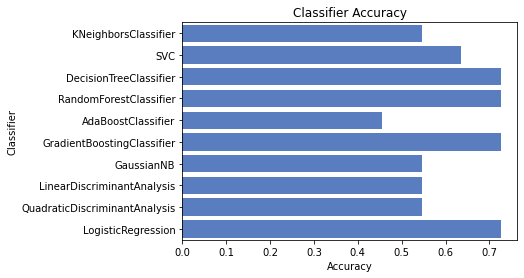

In [59]:
# To skip warning noise ☺️
import warnings
warnings.filterwarnings('ignore')

# DF to collect classifier accuracy and further visualisation
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

# Testing all classifiers and adding their accuracy
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

# Plotting accuracy of each classifier for convinience
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

### Run best classifier
As we can see on the graph above, [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) turned to be the best model for our data

##### <font color='red'>!!!WARNING!!!</font>
The above statement is not always TRUE for every new launch of the code, but based on our surveillance, in general, exact Random Forest perform better at the end

In [46]:
# Launch our model
candidate_classifier = RandomForestClassifier()
candidate_classifier.fit(X_train, y_train)
result = candidate_classifier.predict(X_test)

In [47]:
# Measure accuracy on test set
acc = accuracy_score(y_test,result)
acc

0.6363636363636364

### Evaluate feature importance
On these stage we will be able to identify more important independent variables for our model

avg_salary has score: 0.09991321405500617
GRP has score: 0.09429579293581397
budget has score: 0.11678039416917128
population has score: 0.09793105743089864
small_business has score: 0.20179984343553706
total_employees has score: 0.12270496760997378
sb_employees has score: 0.2015249460968706
active_programms has score: 0.06504978426672854


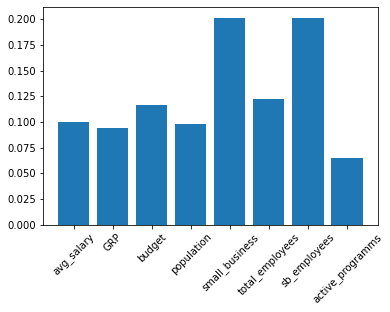

In [48]:
importance = candidate_classifier.feature_importances_

# Summarize feature importance        
for i, v in zip(norm_data.columns[1:-1], importance):
    print(i, 'has score:', v)
    
# Plot feature importance
plt.bar([x for x in norm_data.columns[1:-1]], importance)
plt.xticks(rotation=45)
plt.show()

## Ranking regions of Russia by convenience of running a business
Based on normalized data (from 0 to 100) and our model features importance coefficients

### Methodology:
$\text{Sum Of Points}_{region} = \sum \limits _{i=1} ^{n} \text{Importance Coefficient}_i \cdot \text{Normalized Value}_i$

In [49]:
# Multiply our data columns on importance coefficient 
rank = norm_data

for i, j in zip(range(1,9), range(0,8)):
    rank.iloc[:, i] = rank.iloc[:, i] * importance[j]
    i += 1
    j += 1

rank

,region,avg_salary,GRP,budget,population,small_business,total_employees,sb_employees,active_programms,group
0,Altai region,0.132220,0.279154,0.511007,1.761928,1.240364,1.792583,1.944464,0.813122,Middle
1,Amur region,2.197475,0.133202,0.261866,0.578203,0.356203,0.641703,0.638424,0.406561,Middle
2,Arhangelsk region,2.649341,0.254077,0.393283,0.812590,0.497756,0.886733,0.882281,0.813122,Middle
3,Astrakhan region,1.059281,0.226354,0.182470,0.745431,0.347718,0.827044,0.548363,1.626245,Middle
4,Belgorod region,1.027688,0.445611,0.463568,1.166618,0.830281,1.338622,1.410850,0.813122,Middle
...,...,...,...,...,...,...,...,...,...,...
80,Chechen Republic,0.188021,0.080763,0.359862,1.112029,0.091335,0.893290,0.260442,2.845928,Ineffective
81,Chuvash Republic,0.389943,0.135908,0.228790,0.909788,0.579518,0.997108,0.953872,0.813122,Middle
82,Chukotka Autonomous Okrug,9.991321,0.014493,0.108855,0.004788,0.000000,0.017390,0.001119,0.000000,Ineffective
83,Yamalo-Nenets Autonomous Area. county,9.615226,1.453378,1.026316,0.387829,0.182634,0.490790,0.354077,3.252489,Middle


In [50]:
# Computing sum of all points on all features to get final rating
rank['Sum Of Points'] = rank.iloc[:, 1:9].sum(axis=1)

In [57]:
# TOP 10 best regions 
rank.iloc[:, [0,-1]].sort_values('Sum Of Points', ascending=False).head(10)

,region,Sum Of Points
29,Moscow,13.998620
63,St. Petersburg,5.690336
30,Moscow region,4.957328
66,Sverdlovsk region,3.211219
22,Krasnodar region,3.088771
57,Republic of Tatarstan,2.853910
60,Rostov region,2.444686
33,Nizhny Novgorod Region,2.400649
35,Novosibirsk region,2.377949
62,Samara Region,2.367433


In [52]:
# TOP 10 worst regions
rank.iloc[:, [0,-1]].sort_values('Sum Of Points', ascending=False).tail(10)

,region,Sum Of Points
38,Oryol Region,3.075518
56,Republic of North Ossetia - Alania,2.628729
43,Republic of Adygea,2.609671
58,Tyva Republic,2.573363
10,Jewish Autonomous Oblast,2.488118
67,Sevastopol,2.476857
14,Kabardino-Balkar Republic,2.286367
44,Altai Republic,1.844293
48,The Republic of Ingushetia,1.634902
49,Republic of Kalmykia,1.108336
